Project Statement:
The Great Recession of 2007-09 and its aftermath marked the start of a new era in American monetary policy. The Federal Reserve's policy rate was over 500 basis points prior to 2008. The policy rate dropped fast to 25 basis points in 2008, and has remained there ever since. Prior to 2008, the Federal Reserve's balance sheet was less than $1 trillion dollars, or around 7% of GDP (GDP). The Federal Reserve's security holdings and liabilities are currently approaching $4.5 trillion, or about 25% of GDP. Many analysts believe that the recent global financial crisis was caused by excessively expansionary monetary policy. For example, Taylor (2007) asserts that the Fed placed interest rates significantly below the optimal rate. Extremely low interest rates lowered borrowing costs, causing financial institutions to overleverage their balance sheets in the chase of higher profits. This entailed investing in risky assets, such as the well-known "toxic assets" (structured financial instruments), which provided high returns while maintaining good credit ratings. However, to overcome the crisis of 2008, in order to alleviate financial institutions' funding concerns and avert a credit crunch during difficult times, central banks worked hard to meet their liquidity demands by being as lender of last resort. Several measures taken to protect monetary policy transmission have resulted in considerable changes in the composition of central bank balance sheets. Fed moved beyond setting short-term interest rates between banks and implemented for the first time policies known as “quantitative easing” as well as was constrained itself by the “zero lower bound”. Central banks used alternative measures to bypass the limitations of traditional monetary policy like: asset purchase programs and forward guidance. Thus, through my project, I want to find out the effects on stock volatility due to change of monetary policy before and after financial crisis of 2008. To get the result, I will be using S&P 500 Index from Yahoo Finance and Balance Sheet data from Federal Reserve Economic Data with the help of Python. The link of the data source is: https://fred.stlouisfed.org/release/tables?rid=20&eid=1194154#snid=1194156

Goal:
The goal is to see the effects on stock volatility due to change of monetary policy before and after financial crisis of 2008.

Arguement: The impact of quantitative easing on stock prices has a wide range of opinions. Dobbs et al. (2013), for example, assert that there is insufficient evidence to back up widely held beliefsview that quantitative easing (QE) has boosted stock prices‘conventional wisdom regarding the consequences of quantitative easing on the economy'equities is almost certainly incorrect'. On the contrary, Newman (2012) claims that there is a "unmistakable association" between the Fed's QE initiatives and inflation. The stock market has been on a four-year winning streak'.

According to Hubble (2013), ‘when the Federal Reserve's balance sheet expands (QE), the stock market rises,' and that "after 2008, a stop in QE has led to a rise in the stock market. Thus, Stocks are dropping in value."Stock values, he argues, have surged since the Fed launched ‘QE Infinity at a rate of $85 billion per month' (meaning QE3).

According to Lenzner (2014), there is a one-to-one relationship between the Fed's securities purchases and stock prices. He talks on the Fed's "amazing achievement," which he says "would never have happened if the Fed hadn't been pouring $85 billion every month into Treasury securities and mortgage-backed bonds, which pushed down interest rates and pushed up bond and stock prices." QE worked well for Lenzner, who quotes Arbor Research's Jim Bianco as noting, "QE has been exceptionally helpful in raising stock values."

However, Ritholtz (2013) disagrees with Lenzner (2013)'s research, claiming that rising stock prices were caused by factors other than QE. He cites a number of reasons for his aversion to blaming the post-crisis stock market rise solely on QE. The first is that markets are extraordinarily complicated, involving a wide range of psychological, value, trend, and monetary factors. As a result, he claims that "there is almost never any one single factor that causes major market moves in either direction" and that "if you are willing to say the Fed is the cause of 100% of market gains, you are simultaneously implying that every other factor had a net zero impact," a claim that he disputes. Another argument opposing the idea that QE has a 100 percent effect on stock prices is market performance during secular bear markets, where he explicitly distinguishes between secular and cyclical stock price fluctuations. He also discusses earnings variability and the potential of timing being coincidental, implying the difference between correlation and causality. Alternative variables, in fact, are to blame for the market's rally after Donald Trump's win.

The pathways of causation — that is, how the effect is carried from asset purchases to stock prices – is an issue with multiple answers. Because QE is essentially an expansionary monetary policy, the relationship between QE and stock prices is the same as the relationship between the money supply and stock prices. However, because banks have been amassing reserves rather than lending out funds, the Fed's balance sheet expansion has not been accompanied by an equivalent or proportional increase in monetary aggregates. This may explain why Ross (2015) claims that QE has an effect on the stock market, although it is difficult to say how or to what amount. If causation goes from monetary expansion to stock prices, the fact that banks have not been growing credit, and hence the money supply, may be taken against the thesis that QE was ‘the' reason, or a key reason, for the stock market rebound.

According to Ross (2015), QE distorts financial prices because it entails price signal manipulation, which takes the shape of lower interest rates, more asset demand, and reduced money purchasing power. Instead of stock prices reflecting the true value of a firm and investor demand, manipulated prices force market participants to change their tactics to chase stocks that gain in value without their underlying companies being more valuable. Another way that QE affects stock prices is through this channel.

The goal of this study is to present empirical evidence on the impact of quantitative easing on stock prices.
While quantitative easing has powered the US stock market, the post-crisis rebound cannot be credited solely to this strategy, and the negative market of 2015, 2020 cannot be entirely explained in terms of the termination of QE. 

Data:  To get the result, I will be using S&P 500 Index from Yahoo Finance and Balance Sheet data from Federal Reserve Economic Data.

In [17]:
#plots.py
import os
import pandas
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import datetime
import math

def gather_data(data_codes, start, end = datetime.datetime.today(), freq = "A"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

def plot_ts_scatter(df, s = 75, figsize = (40, 20), save_fig = False, pp = None):
    # Create plot for every unique pair of variables
    plot_vars = list(df.keys())
    for var1 in plot_vars:
        for var2 in plot_vars:
            if var1 != var2:
                fig, ax = plt.subplots(figsize = figsize)
                # Create list of years from index
                # Year will be represented by color
                if "Year" not in df.keys():
                    df["Year"] = [int(str(ind)[:4]) for ind in df.index] 
                df.plot.scatter(x = var1, y = var2, s = s, ax = ax, 
                                c = "Year", cmap = "viridis")
                # Turn the text on the x-axis so that it reads vertically
                ax.tick_params(axis='x', rotation=90)
                # Get rid of tick lines perpendicular to the axis for aesthetic
                ax.tick_params('both', length=0, which='both')
                # save image if PdfPages object was passed
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    plt.savefig("plots/" + str(plot_vars).replace("[", "").replace("]","")[:40] + " scatter.png",
                            bbox_inches = "tight")
                    if pp != None: pp.savefig(fig, bbox_inches = "tight")

def plot_lines(df, title = False, linewidth = 1, figsize = (40,20), full_index = False, 
               h_line = False, max_y = False, legend = True, pp = None, show_inversion = False):
    fig, ax = plt.subplots(figsize = figsize)
    # If no secondary_y (axis), plot all variables at once
    df.plot.line(linewidth = linewidth, ax = ax, legend = legend)
    if h_line != False:
        ax.axhline(h_line, ls = "--", linewidth = 1.5, color = "k")
    # Turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis='x', rotation=90)
    # Get rid of tick lines perpendicular to the axis for aesthetic
    ax.tick_params('both', length=0, which='both')
    if max_y != False:
        ax.set_ylim(bottom = 0, top = max_y)
    if full_index:
        plt.xticks([i for i in range(len(df.index))], list(df.index))
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals]) 

    # transform y-axis values from sci notation to integers
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals]) 
    if title != False:
        plt.title(title, fontsize = 72)

    if show_inversion:
        trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
        ax.fill_between(df.index, 0, df.max().max(), where=df["2 Y (%)"] < df["1 M (%)"],
                    facecolor='red', alpha=0.2, transform = trans)
    # format image filename 
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")
    plt.savefig(filename[:50] + " line.png",
                bbox_inches = "tight")
    #[:50] + " line.png"
    # save image if PdfPages object was passed
    if pp != None: pp.savefig(fig, bbox_inches = "tight")

def plot_stacked_lines(df, plot_vars, linewidth = 1, figsize = (40,20), 
                       pp = None, total_var = False):
    fig, ax = plt.subplots(figsize = figsize)
#    mpl_colors = ["C" + str(i) for i in range(11)]
    df[plot_vars].plot.area(stacked = True, linewidth = linewidth,
                            ax = ax)
    if total_var != False:
        df[total_var].plot.line(linewidth = linewidth, ax = ax, c = "k",
              label = total_var, ls = "--")
    ax.legend(loc=2, ncol = 2)

In [19]:

# Here is the code for creating the statistics I am tracking for my companies

# this is the total number of observations
def total(list_obj):
    total = 0
    n = len(list_obj)
    for i in range(n):
        total += list_obj[i]
    return total

# Finds the average for each data set
def mean(list_obj):
    n = len(list_obj)
    mean_ = total(list_obj) / n
    return mean_ 

# find the median of each data set
def median(list_obj):
    n = len(list_obj)
    list_obj = sorted(list_obj)
    if n % 2 != 0:
        middle_index = int((n - 1) / 2)
        median_ = list_obj[middle_index]
    else:
        upper_middle_index = int(n / 2)
        lower_middle_index = upper_middle_index - 1
        median_ = mean(list_obj[lower_middle_index : upper_middle_index + 1]) 
    return median_

#Find the mode of each data set
def mode(list_obj):
    max_count = 0
    counter_dict = {}
    for value in list_obj:
        counter_dict[value] = 0
    for value in list_obj:
        counter_dict[value] += 1
    count_list = list(counter_dict.values())
    max_count = max(count_list)
    mode_ = [key for key in counter_dict if counter_dict[key] == max_count]
    return mode_

# Finds the variaence of each data set
def variance(list_obj, sample = False):
    list_mean = mean(list_obj)
    n = len(list_obj)
    sum_sq_diff = 0
    for val in list_obj:
        sum_sq_diff += (val - list_mean) ** 2
    if sample == False:
        variance_ = sum_sq_diff / n
    else:
        variance_ = sum_sq_diff / (n - 1)
    return variance_

# Finds the Standerd Deviation of each data set
def SD(list_obj, sample = False):
    SD_ = variance(list_obj, sample) ** (1/2)
    return SD_

# FInds the covariance of each of data set
def covariance(list_obj1, list_obj2, sample = False):
    mean1 = mean(list_obj1)
    mean2 = mean(list_obj2)
    cov = 0
    n1 = len(list_obj1)
    n2 = len(list_obj2)
    if n1 == n2:
        n = n1
        for i in range(n1):
            cov += (list_obj1[i] - mean1) * (list_obj2[i] - mean2)
        if sample == False:
            cov = cov / n
        else:
            cov = cov / (n - 1)
        return cov
    else:
        print("List lengths are not equal")
        print("List1:", n1)
        print("List2:", n2)

# Finds the correlation of each data set
def correlation(list_obj1, list_obj2):
    cov = covariance(list_obj1, list_obj2)
    SD1 = SD(list_obj1)
    SD2 = SD(list_obj2)
    corr = cov / (SD1 * SD2)
    return corr

# Finds the skewness of the data set
def skewness(list_obj, sample = False):
    mean_ = mean(list_obj)
    SD_ = SD(list_obj, sample)
    skew = 0
    n = len(list_obj)
    # insert variables into formula
    for val in list_obj:
        skew += (val - mean_) ** 3
        skew = skew / n if not sample else n * skew / ((n - 1)*(n - 1) * SD_ ** 3)
    return skew

#Finds the Kurtosis of each data set
def kurtosis(list_obj, sample = False):
    mean_ = mean(list_obj)
    kurt = 0
    SD_ = SD(list_obj, sample)
    n = len(list_obj)
    for x in list_obj:
        kurt += (x - mean_) ** 4
    kurt = kurt / (n * SD_ ** 4) if not sample else  n * (n + 1) * kurt / \
    ((n - 1) * (n - 2) * (SD_ ** 4)) - (3 *(n - 1) ** 2) / ((n - 2) * (n - 3))
    return kurt

In [20]:
# This summarizes the statistics we are tracking
def gather_statistics(df, sample = False):
    dct = {key:{} for key in df}
    for key, val in df.items():
        val = val.dropna(axis=0)
        dct[key]["mean"] = round(mean(val),3)
        dct[key]["median"] = round(median(val),3)
        dct[key]["variance"] = round(variance(val, sample),3)
        dct[key]["S.D."] = round(SD(val, sample) ,3)
        dct[key]["skewness"] = round(skewness(val, sample),3)
        dct[key]["kurtosis"] = round(kurtosis(val, sample),3)
    stats_df = pd.DataFrame(dct)  
    return stats_df

In [21]:
import os
import pandas
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import datetime
import math
import time

def gather_data1(stocks, start, end = datetime.datetime.today(), freq = "M"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in stocks.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "yahoo", start, end).resample(freq).mean()["Close"]
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            time.sleep(15)
            # If dataframe already exists, add new column
            data_equals = web.DataReader(val, "yahoo", start, end).resample(freq).mean()["Close"]
            df[key] = data_equals

    return df

In [22]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt

def plot_ts_scatter(data, s = 75, figsize = (40, 20), save_fig = False, pp = None):
    # Create plot for every unique pair of variables
    df = data.copy()
    for var1 in df:
        for var2 in df:
            if var1 != var2:
                fig, ax = plt.subplots(figsize = figsize)
                # Create list of years from index
                # Year will be represented by color
                if "Year" not in df.keys():
                    df["Year"] = [int(str(ind)[:4]) for ind in df.index] 
                df.plot.scatter(x = var1, y = var2, s = s, ax = ax, 
                                c = "Year", cmap = "viridis")
                # Turn the text on the x-axis so that it reads vertically
                ax.tick_params(axis='x', rotation=90)
                # Get rid of tick lines perpendicular to the axis for aesthetic
                ax.tick_params('both', length=0, which='both')
                # save image if PdfPages object was passed
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    plt.savefig("plots/" + str(list(df.keys())).replace("[", "").replace("]","")[:40] + " scatter.png",
                            bbox_inches = "tight")
                    if pp != None: pp.savefig(fig, bbox_inches = "tight")

In [23]:
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, start, 
                end = datetime.datetime.today(), freq = "M"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

In [24]:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }
               
# Select start and end dates
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
fed_data = gather_data(data_codes = data_codes, start = start, 
                   end = end, freq = "M")


In [25]:
fed_data

,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),"Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",Balance Sheet: Securities Held Outright ($ Mil),Balance Sheet: U.S. Treasuries Held Outright ($ Mil),Balance Sheet: Federal Agency Debt Securities ($ Mil),Balance Sheet: Mortgage-Backed Securities ($ Mil),Balance Sheet: Repos ($ Mil),Balance Sheet: Central Bank Liquidity Swaps ($ Mil),...,Balance Sheet: Deposits from Dep. Institutions ($ Mil),Balance Sheet: U.S. Treasury General Account ($ Mil),Balance Sheet: Other Deposits ($ Mil),Balance Sheet: All Deposits ($ Mil),Federal Funds Target (Pre-Crisis),Federal Funds (Upper) Target,Effective Federal Funds Rate,Interest on Excess Reserves,Vault Cash ($ Mil),Vault Cash Used as Req. ($ Mil)
DATE,,,,,,,,,,,,,,,,,,,,,
2002-01-31,653800.0,635.42900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.25620,NaN,1.75,NaN,1.729677,NaN,45416.20,33.731
2002-02-28,654600.0,635.88400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.23025,NaN,1.75,NaN,1.739643,NaN,45947.00,33.239
2002-03-31,659000.0,639.69750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.22225,NaN,1.75,NaN,1.730000,NaN,42567.25,31.209
2002-04-30,663400.0,643.57950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.25025,NaN,1.75,NaN,1.753000,NaN,42146.25,31.222
2002-05-31,668600.0,648.29320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.22700,NaN,1.75,NaN,1.751290,NaN,41926.20,31.104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,6042100.0,2154.81925,7775974.00,7614925.00,7207246.25,4986900.00,2347.0,2217999.25,0.00,759.75,...,3884245.25,953095.75,372.83675,5255878.75,NaN,0.25,0.069000,0.100000,NaN,NaN
2021-05-31,6041900.0,2167.94475,7866893.25,7709974.25,7291913.75,5063447.75,2347.0,2226119.00,11.75,642.50,...,3883067.75,862533.00,380.02900,5142879.50,NaN,0.25,0.058065,0.100000,NaN,NaN
2021-06-30,6027100.0,2178.90020,8026555.20,7874851.20,7450341.40,5149903.00,2347.0,2298091.20,0.00,516.00,...,3789613.40,767312.40,332.96560,4906226.60,NaN,0.25,0.078000,0.123333,NaN,NaN


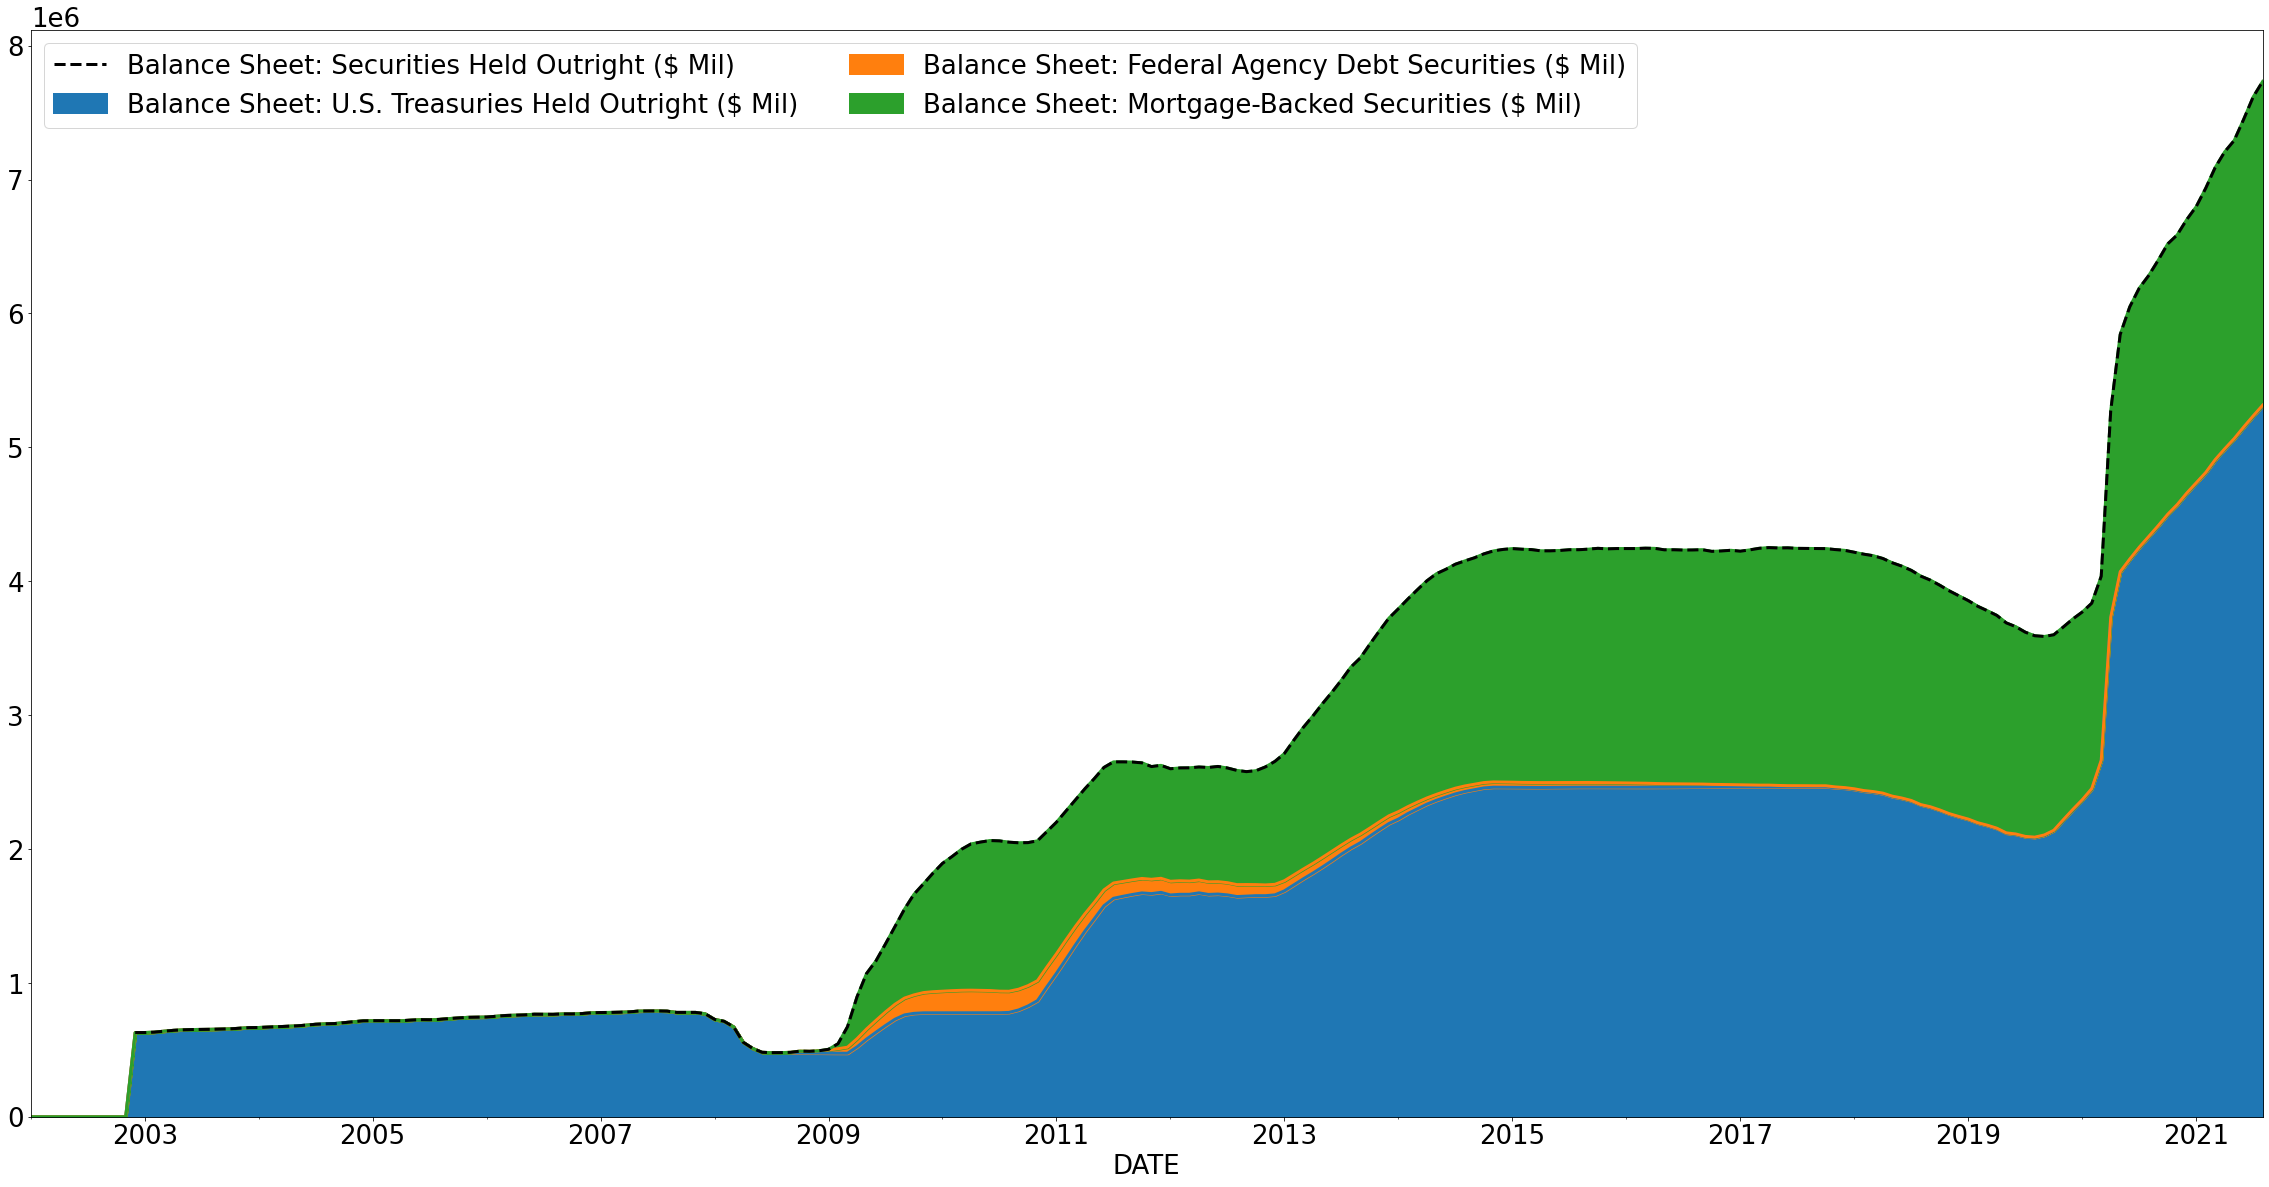

In [29]:
account_vars = ["Balance Sheet: U.S. Treasuries Held Outright ($ Mil)",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)"]

# these three subcomponents comprise the value of securities held outright in its entirety. To more distinctly show
# the total value of securities held by the Fed, increase linewidth.
plot_stacked_lines(fed_data, account_vars, linewidth = 3, 
                   total_var = "Balance Sheet: Securities Held Outright ($ Mil)")

In [5]:
!pip install pandas-datareader

In [6]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()
print(start, end)

2002-01-01 00:00:00 2021-10-03 10:33:30.950587


In [7]:
#S&P 500 Index

data_dict = {}
stocks = ["SPX"]
for key in stocks:
 data_dict[key] = web.DataReader(key, 'yahoo', start, end)
data_dict

{'SPX':                High      Low     Open    Close    Volume  Adj Close
 Date                                                               
 2002-01-02  1.37409  1.37409  1.37409  1.37409       0.0    1.37409
 2002-01-03  1.37409  1.37409  1.37409  1.37409       0.0    1.37409
 2002-01-04  1.37409  1.37409  1.37409  1.37409       0.0    1.37409
 2002-01-07  1.37409  1.37409  1.37409  1.37409       0.0    1.37409
 2002-01-08  1.37409  1.37409  1.37409  1.37409       0.0    1.37409
 ...             ...      ...      ...      ...       ...        ...
 2018-01-24  0.05500  0.05500  0.05500  0.05500    7000.0    0.05500
 2018-01-25  0.05500  0.05500  0.05500  0.05500    1160.0    0.05500
 2018-01-26  0.05000  0.05000  0.05000  0.05000    1800.0    0.05000
 2018-01-29  0.06000  0.05000  0.06000  0.05000   60817.0    0.05000
 2018-01-30  0.05000  0.04500  0.05000  0.05000  150100.0    0.05000
 
 [4030 rows x 6 columns]}

In [8]:
for df in data_dict.values():
    print(df["Adj Close"])

Date
2002-01-02    1.37409
2002-01-03    1.37409
2002-01-04    1.37409
2002-01-07    1.37409
2002-01-08    1.37409
               ...   
2018-01-24    0.05500
2018-01-25    0.05500
2018-01-26    0.05000
2018-01-29    0.05000
2018-01-30    0.05000
Name: Adj Close, Length: 4030, dtype: float64


In [9]:
adj_close_data = pd.concat((df["Adj Close"] for df in data_dict.values()), 
                       keys = data_dict.keys(),
                        axis = 1) # concatenate columns horizontally
adj_close_data

,SPX
Date,
2002-01-02,1.37409
2002-01-03,1.37409
2002-01-04,1.37409
2002-01-07,1.37409
2002-01-08,1.37409
...,...
2018-01-24,0.05500
2018-01-25,0.05500
2018-01-26,0.05000


Text(0.5, 1.0, 'Daily Total Stock Price Movement')

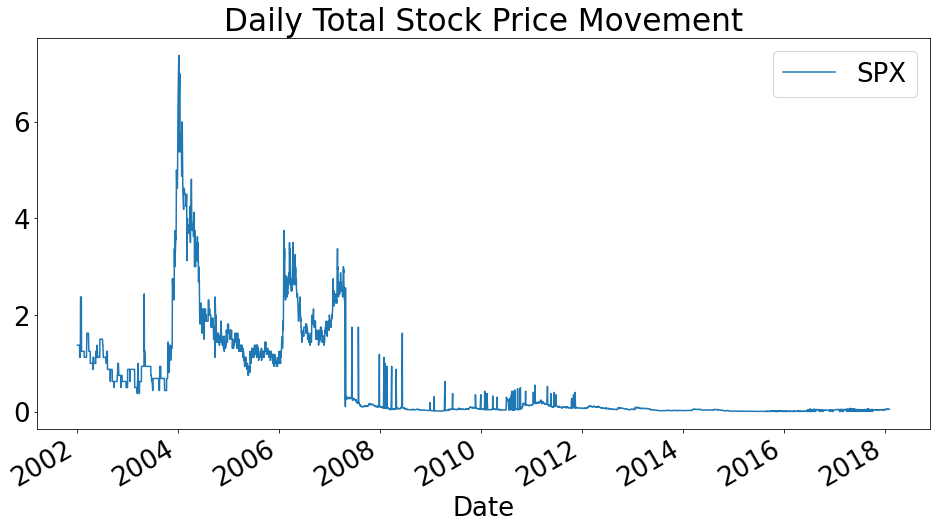

In [10]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (16,8))
adj_close_data.plot.line(ax = ax, legend = True)

ax.set_title("Daily Total Stock Price Movement")

In [13]:
price_change_data = adj_close_data.pct_change() * 100
price_change_data

,SPX
Date,
2002-01-02,NaN
2002-01-03,0.000000
2002-01-04,0.000000
2002-01-07,0.000000
2002-01-08,0.000000
...,...
2018-01-24,0.000000
2018-01-25,0.000000
2018-01-26,-9.090907


In [26]:
stats_df = gather_statistics(price_change_data, 
                             sample = True)
stats_df

,SPX
S.D.,132.031
kurtosis,421053.210
mean,17.654
median,0.000
skewness,-0.000
variance,17432.122


<ipython-input-27-682920cfa481>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])


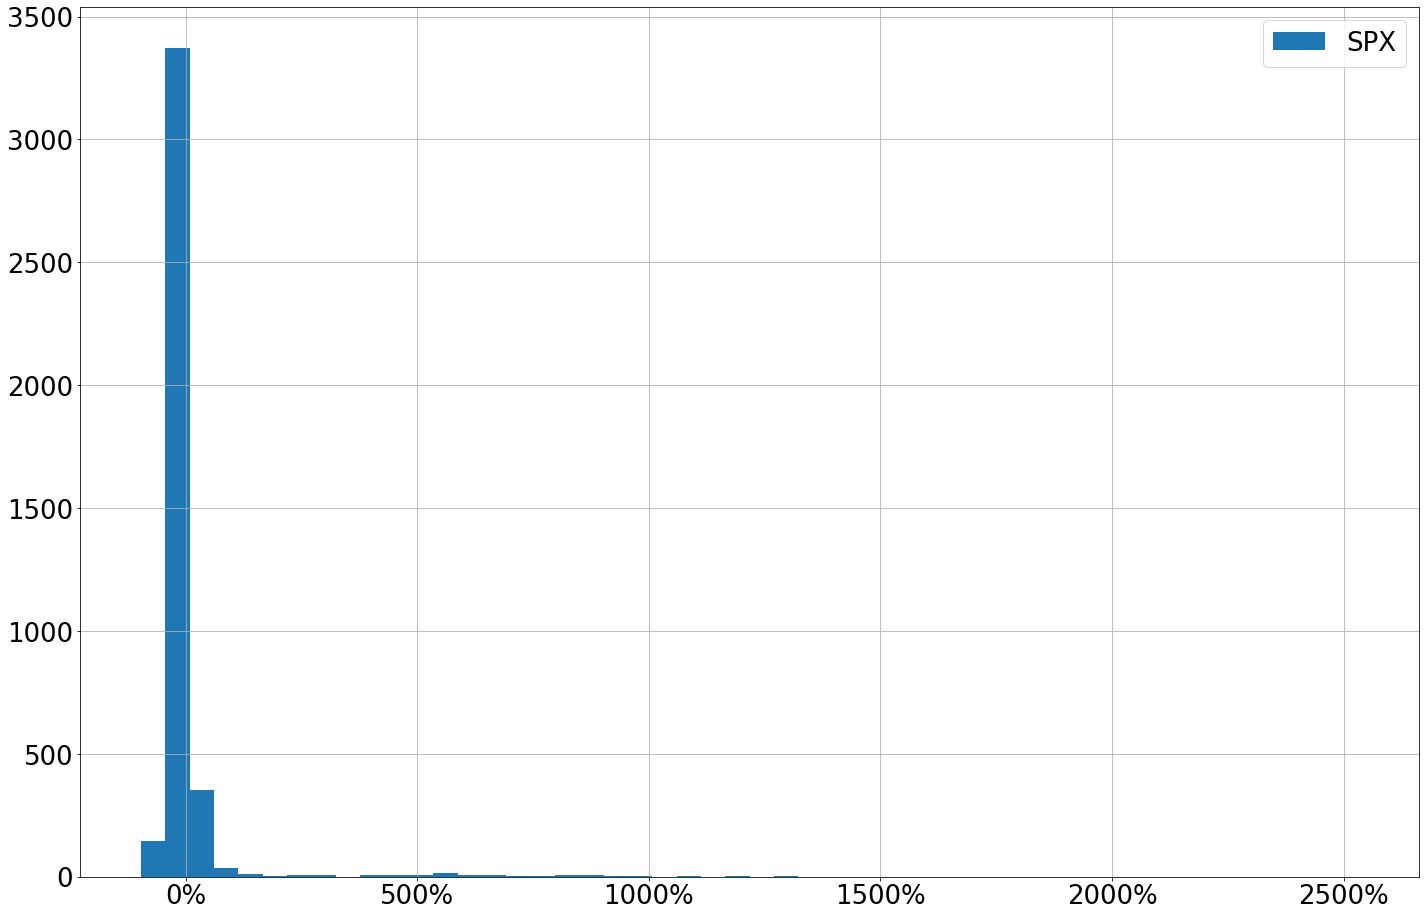

In [27]:
fig, ax = plt.subplots(figsize = (24, 16))
price_change_data["SPX"].hist(bins = 50, label = "SPX")
x_vals = ax.get_xticks()
ax.set_xticklabels([str(int(x)) + "%" for x in x_vals])
plt.legend()
plt.show()

Throughout the paper, I wll try to figure out the relationship of these two above data and wll come to a result as per the Goal defined